# Matplotlib base

Matplotlib est un des outils qui permet de faire des graphiques avec Python.

## %matplotlib

Ce mot "magique" permet d'indiquer à jupyter le type de graphique souhaité (statique ou interactif, matriciel ou vectoriel, avec qt...)

Voir https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib 

In [1]:
%matplotlib -l

Available matplotlib backends: ['agg', 'auto', 'cairo', 'gtk3', 'gtk3agg', 'gtk3cairo', 'gtk4', 'gtk4agg', 'gtk4cairo', 'inline', 'ipympl', 'macosx', 'nbagg', 'notebook', 'osx', 'pdf', 'pgf', 'ps', 'qt', 'qt5', 'qt5agg', 'qt5cairo', 'qt6', 'qtagg', 'qtcairo', 'svg', 'template', 'tk', 'tkagg', 'tkcairo', 'webagg', 'widget', 'wx', 'wx', 'wxagg', 'wxcairo']


In [2]:
%matplotlib inline    
# inline est OK pour créer des images statiques matricielles (png)
# notebook ajoute de l'interactivité dans le notebook (zoom...)
# widget aussi, mais avec ipywidget qui marche mieux que notebook dans vs-code.
# qt ou tk ouvrent des fenêtres en dehors du notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
a = np.array([3., 5.6,3.3, 4.7,])

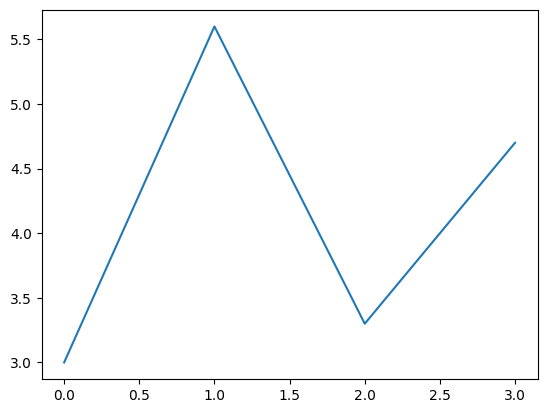

In [5]:
plt.plot(a)

# ⚠️ Préférez l'approche objet !

Cela vous facilitera la vie pour préciser si vous voulez 2 courbes sur le même axe ou 2 axes dans la même figure, ou pour modifier ensuite un élément de la figure.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


Text(0, 0.5, 'weigth')

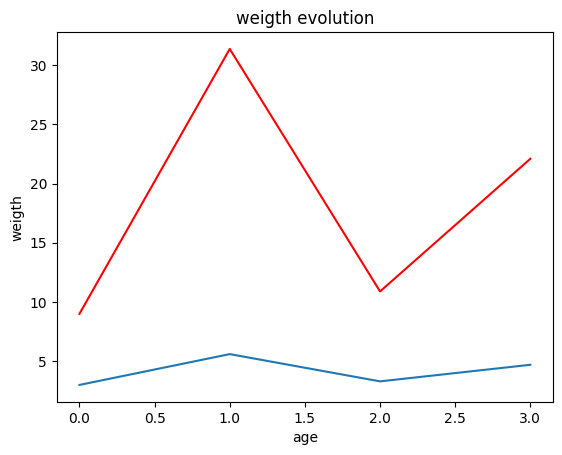

In [6]:
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))
ax.plot(a)
ax.plot(a**2, color='r')
ax.set_title('weigth evolution')
ax.set_xlabel('age')
ax.set_ylabel('weigth')

# Grille de subplots

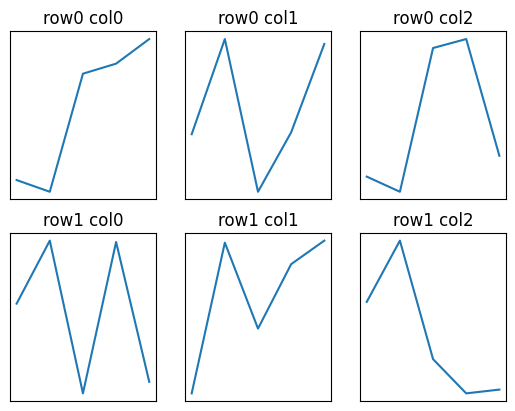

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=3)
for row in range(2):
    for column in range(3):
        ax = axs[row,column]
        ax.plot(np.random.rand(5))
        ax.set_title(f'row{row} col{column}')
        ax.set_xticks([])
        ax.set_yticks([])
fig.savefig('mafigure.svg')


# 2 variables, styles et couleurs, limites, légende...

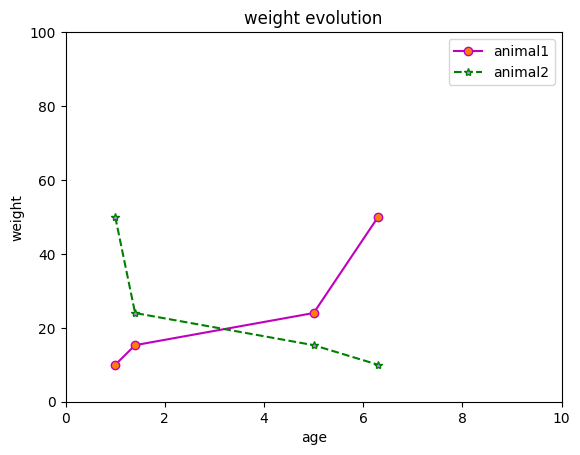

In [8]:
fig, ax = plt.subplots()
a = np.array([1, 1.4, 5, 6.3])
w = np.array([10, 15.3, 24, 50.])
w2 = w[::-1]
ax.plot(a, w, marker='o', linestyle='-', color='m', markerfacecolor='#FF8000', label='animal1')
ax.plot(a, w2, marker='*', linestyle='--', color='g', markerfacecolor='#C280FF', label='animal2')
ax.set_title('weight evolution')
ax.set_xlabel('age')
ax.set_ylabel('weight')
ax.set_xlim(0,10)
ax.set_ylim(0,100)
ax.legend()

 # scatter plot
 
 Il y a plusieurs façons de tracer des nuages de points :
 - `plot` en supprimant les lignes entre les points (`linestyle='None'`) et en ajoutant un `marker`
 - `scatter` en spécifiant ou non le type de `marker`.

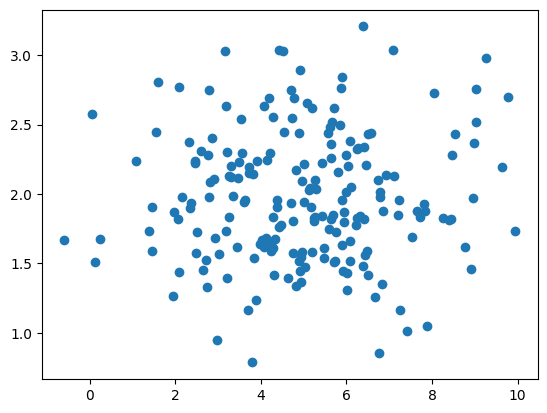

In [9]:
fig, ax = plt.subplots()
x = np.random.randn(200)*2+5
y = np.random.randn(200)/2+2
ax.plot(x, y, marker='o', linestyle='None', )


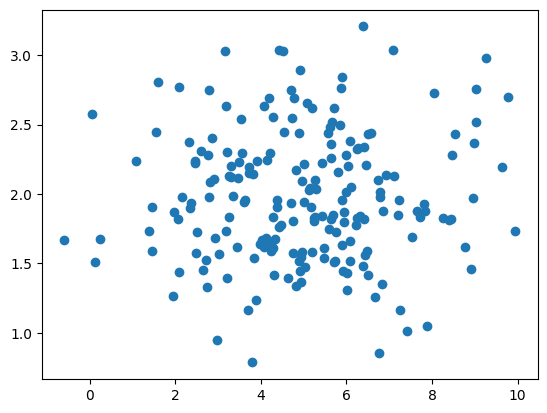

In [10]:
fig, ax = plt.subplots()
ax.scatter(x, y);

# Tracé d'histogramme

numpy propose une fonction `histogram` qui renvoie `count`, `bins`.


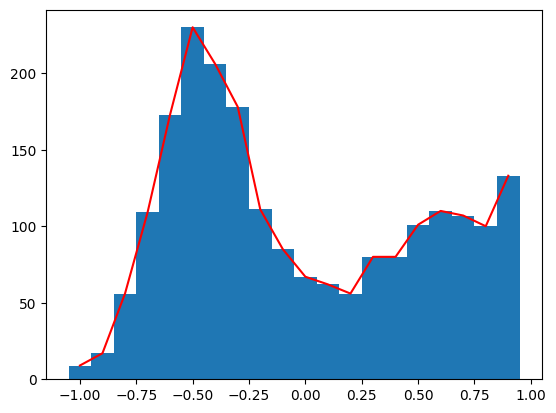

In [11]:
# les 1000 premières valeurs de a sont issues d'une variable aléatoire de moyenne -0.4 et d'écart-type 0.2 
# les 4000 valeurs suivantes sont issues d'une autre variable aléatoire de moyenne 1.6 et d'écart-type 1
a = np.concatenate([np.random.randn(1000)*.2-.4, np.random.randn(4000)+1.6])
# On choisit des seuils entre -1 et 1 avec un pas de 0.1
bins = np.arange(-1, 1.1, .1)
# Pour chaque intervalle entre 2 seuils/bins successifs on obtient le nombre d'observations
count, bins = np.histogram(a, bins=bins)
fig, ax = plt.subplots()
# Attention le vecteur bins correspond au limites de bins donc count.size = bins.size - 1
ax.bar(bins[:-1],count,width=.1)
ax.plot(bins[:-1],count, color='r')

(array([  2.,   1.,   1.,   1.,   0.,   1.,   5.,  10.,  27., 127., 241.,
        313., 262., 144., 100.,  93.,  96., 118., 148., 152., 147., 182.,
        232., 233., 209., 241., 209., 204., 210., 174., 180., 152., 153.,
        112., 115.,  97.,  79.,  61.,  43.,  33.,  29.,   9.,  19.,  17.,
          4.,   6.,   3.,   1.,   2.,   2.]),
 array([-2.03566174, -1.89446708, -1.75327241, -1.61207775, -1.47088309,
        -1.32968842, -1.18849376, -1.04729909, -0.90610443, -0.76490976,
        -0.6237151 , -0.48252044, -0.34132577, -0.20013111, -0.05893644,
         0.08225822,  0.22345288,  0.36464755,  0.50584221,  0.64703688,
         0.78823154,  0.9294262 ,  1.07062087,  1.21181553,  1.3530102 ,
         1.49420486,  1.63539953,  1.77659419,  1.91778885,  2.05898352,
         2.20017818,  2.34137285,  2.48256751,  2.62376217,  2.76495684,
         2.9061515 ,  3.04734617,  3.18854083,  3.32973549,  3.47093016,
         3.61212482,  3.75331949,  3.89451415,  4.03570882,  4.17690348,
 

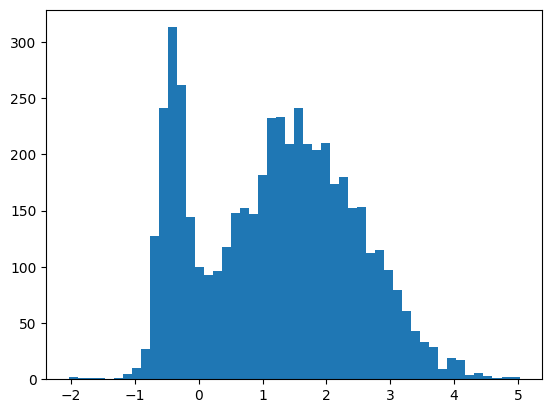

In [12]:
#plus simplement
fig, ax = plt.subplots()
ax.hist(a, bins=50)

# image

In [13]:
# generation des data : une belle boite d'oeuf vu du dessus
x = np.cos(np.linspace(0, 4*np.pi, 100))
y = np.sin(np.linspace(0, 4*np.pi, 100))
X,Y = np.meshgrid(x,y)
data = Y*X

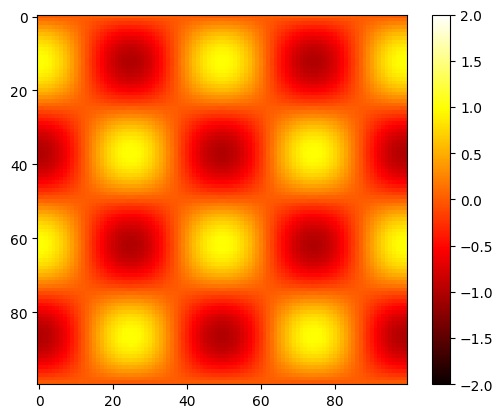

In [14]:
# attention interpolation
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='hot', interpolation='nearest')
im.set_clim(-2, 2)
fig.colorbar(im, ax=ax)

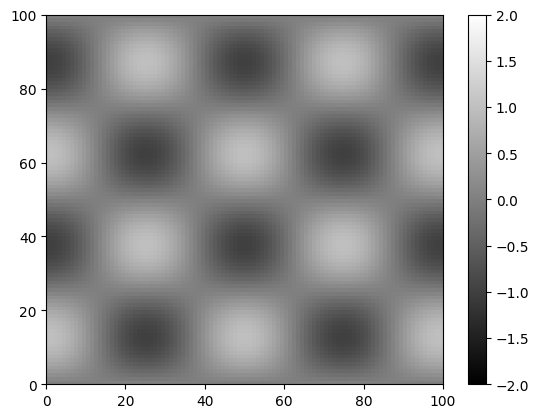

In [15]:
fig, ax = plt.subplots()
im = ax.pcolormesh(data, cmap='gray',)
im.set_clim(-2, 2)
fig.colorbar(im, ax=ax)

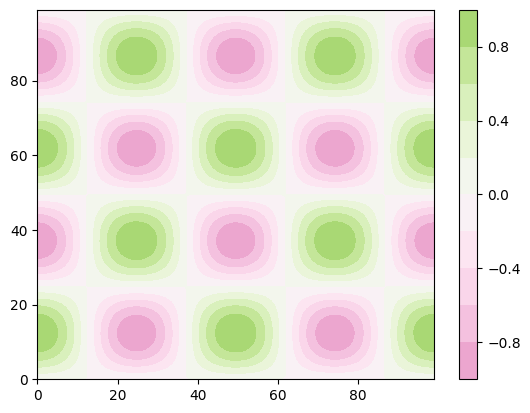

In [16]:
fig, ax = plt.subplots()
im = ax.contourf(data, cmap='PiYG', levels=9)
im.set_clim(-2, 2)
fig.colorbar(im, ax=ax)

# fill_between

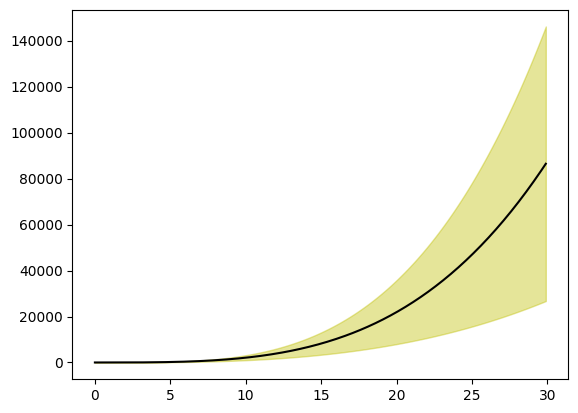

In [17]:
fig, ax = plt.subplots()
x = np.arange(0,30, .1)
y1 = x**3
y2 = x**3.5
m = (y1 + y2)/2

ax.fill_between(x, y1, y2, color='y', alpha=.4)
ax.plot(x, m, color='k')


# Excercice 1


Créer un signal sinusoidal de fréquence 5 Hz, avec une fréquence d'échantillonage de 1000 Hz sur l'intervalle 0-3s.

Aide : il faut créer un vecteur **temps**


# Solution 1

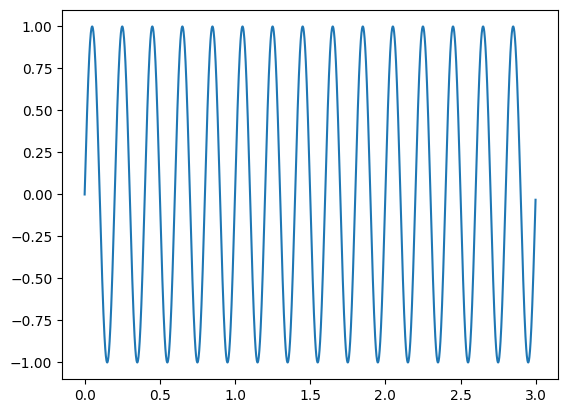

In [18]:
freq = 5.
sample_rate = 1000.
duration = 3.
times = np.arange(0, duration, 1/sample_rate)

sig = np.sin(times * 2 * np.pi * freq)

fig, ax = plt.subplots()
ax.plot(times, sig)



# exercice 2

Idem exercice 1 mais en ajoutant du bruit blanc.



# Solution 2

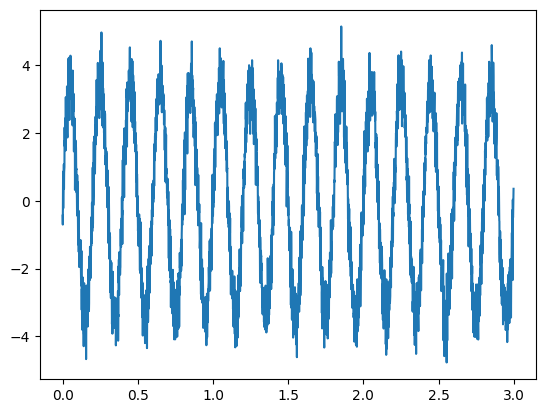

In [19]:
freq = 5.
sample_rate = 1000
times = np.arange(0, 3, 1./sample_rate)
sig = np.sin(2*np.pi*freq*times) * 3.5
noise = np.random.randn(sig.shape[0]) * .5
sig = sig + noise
fig, ax = plt.subplots()
ax.plot(times, sig)



# excerice 3

  * Générer 9 signaux sinusoidaux de frequence 5Hz entre 0 et 3.s.
  * Chaque signal a niveau de bruit de plus en plus grand (faire un peu comme on veut)
  * Sur la figure 1 : Afficher chaque signal dans un subplot sur une grille
  * Sur la figure 2 : afficher la moyenne et la std.

# Solution 3

(9, 3000)


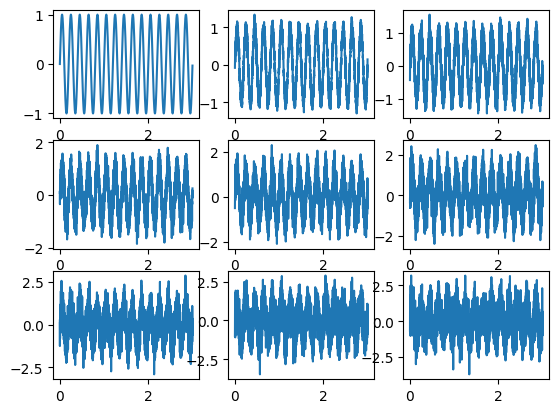

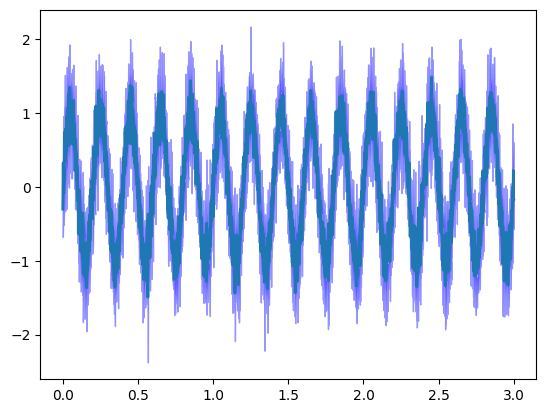

In [20]:
sampling_rate = 1000.
freq = 5.
times = np.arange(0,3, 1./sampling_rate)

#generate data
sigs = []
for i in range(9):
    sig = np.sin(np.pi*2*freq*times)
    noise = np.random.randn(sig.size)*i*.1
    sig = sig + noise
    sigs.append(sig)

fig1, axs = plt.subplots(nrows=3, ncols=3)
#axs = axs.reshape(-1)
axs = axs.flatten()
for i, sig in enumerate(sigs):
    ax = axs[i]
    ax.plot(times, sig)


fig2, ax = plt.subplots()
tab_sigs = np.vstack(sigs)
print(tab_sigs.shape)

m = np.mean(tab_sigs, axis=0)
s = np.std(tab_sigs, axis=0)

ax.plot(times, m, linewidth=2)
ax.fill_between(times, m-s, m+s, color='b', alpha=.4)
